In [2]:
import numpy as np
import matplotlib.pyplot as plt

[-0.88243561 -0.7493557  -0.42574238  0.17602204  0.04147203  0.39059236
  0.65072381  0.81739764]
[-1.   -0.75 -0.5   0.25  0.    0.5   0.75  0.75]
[-0.9 -0.6 -0.3  0.3  0.   0.3  0.6  0.9]


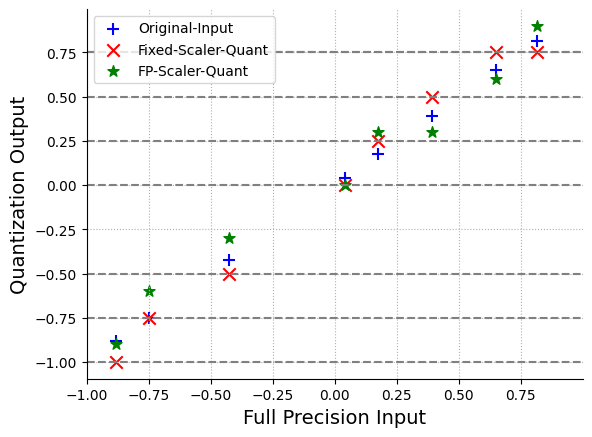

In [97]:
N = 4
Nint = 2
Ndec = N - Nint
s_fixed = pow(2, -Ndec)
xmin, xmax = -pow(2, Nint-1), pow(2, Nint-1)-s_fixed

s = 0.3
n, p = -pow(2, N-1), pow(2, N-1)-1

def q1(x, s, xmin, xmax):
    y = np.clip(s*np.round(x/s), xmin, xmax)
    return y

def q2(x, s, xmin, xmax):
    y = np.clip(np.round(x/s), xmin, xmax)
    return y*s

x = np.arange(-1, 1, 0.25)
x = x + 0.5*np.random.rand(x.shape[0])
y1 = q1(x, s_fixed, xmax=xmax, xmin=xmin)
y2 = q2(x, s, xmax=p, xmin=n)

print(x)
print(y1)
print(y2)

ax = plt.gca()
xticks = np.arange(-1, y1[-1]+s_fixed*2, 0.5)
yticks = np.arange(-1, y1[-1]+s_fixed, 0.25)
plt.scatter(x, x, s=80, marker='+', c='b', label='Original-Input')
plt.scatter(x, y1, s=80, marker='x', c='r', label='Fixed-Scaler-Quant')
plt.scatter(x, y2, s=70, marker='*', c='g', label='FP-Scaler-Quant')

for i in range(y1.shape[0]):
    plt.hlines(y=y1[i], xmin=xticks[0], xmax=xticks[-1], colors='gray', linestyles='--', linewidth=1.5)
    # plt.hlines(y=y2[i], xmin=x[i], xmax=x[i]+0.15, colors='g', linestyles=':')
    # plt.arrow(x[i]+0.1, min(y1[i], y2[i]), 0, abs(y1[i] - y2[i])-0.04, head_width=0.04, head_length=0.04, fc='k', ec='k')

plt.xlim([xticks[0], xticks[-1]])
plt.xticks(yticks)
plt.yticks(yticks)
plt.xlabel('Full Precision Input', fontsize=14)
plt.ylabel('Quantization Output', fontsize=14)
plt.legend(fontsize=10, loc = 'upper left')
plt.grid(linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

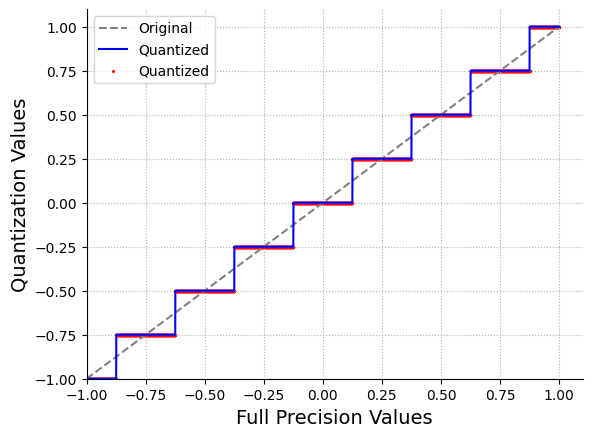

In [98]:
x = np.arange(-1, 1, 0.0001)
xq = q1(x, s_fixed, xmax=xmax, xmin=xmin)
xq = 0.25 * (xq//0.25)

ax = plt.gca()
xticks = np.arange(-1, y1[-1]+s_fixed*2, 0.5)
yticks = np.arange(-1, y1[-1]+s_fixed, 0.25)
plt.plot(x, x, linestyle='--', c='gray', label='Original')
plt.plot(x, xq, linestyle='-', c='b', label='Quantized')
plt.scatter(x, xq, s=1.5, c='r', label='Quantized')

plt.xlim([x[0], x[-1]+0.1])
plt.ylim([x[0], x[-1]+0.1])
# plt.xticks(xticks)
# plt.yticks(yticks)
plt.xlabel('Full Precision Values', fontsize=14)
plt.ylabel('Quantization Values', fontsize=14)
plt.legend(fontsize=10, loc = 'upper left')
plt.grid(linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)